# Part II - Personal Key Indicators for heart disease
## by Huzaifa Shehu Imam


## Investigation Overview
The purpose of this presentation will be to present the findings of my visual analysis of the relationship between our outcome of interest (Heart disease) and 17 other variables in our dataframe. I will investigate if it is correlated in anyway with any of these variables, I will also showcase the distribution of heart disease between the 2 genders, and the different races/ ethnicities. Based on our analysis, we found that heart disease was more prevalent amongst Caucasian men within the 80 years and over age group.Furthermore, I sought to look at the relationship between some of the variables using a correlation heat map, which revealed no significant positive or negative correlation between any of the variables. Only a weak positive correlation was found between physical and mental health. More established relationships, such as that between physical, mental health and sleep time, smoking and stroke etc were all found to not be correlated, surprisingly! The dataset also omitted vital information about the 2 other key indicators, having all three key indicators could have led to a more robust statistical investigation.

## Dataset Overview
The dataset was obtained from the CDC via Kaggle, and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. Heart disease is one of the leading causes of death for people of most races in the US. About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicators include diabetic status, obesity, sedentary lifestyle or much alcoholism. The original dataset contained 401,958 rows and 279 columns, the cleaned dataset contains only 20 columns/variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
heart_disease_df = pd.read_csv("C:/Users/HP/Downloads/heart-disease/heart_2020_cleaned.csv")


In [3]:
def get_category(BMI):
    if not BMI:
        return None
    if BMI < 18.5:
        return "Under Weight"
    if BMI < 25:
        return "Healthy Weight"
    if BMI < 30:
        return "Overweight"
    if BMI < 35:
        return "Obese class I"
    if BMI < 40:
        return "Obese class II"
    return "Obese class III"

heart_disease_df['BMI_Category'] = heart_disease_df['BMI'].apply(get_category)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization 1 - A bar chat showing the counts of respondents based on BMI categories

How many of our respondents are overweight? how many are underweight or Obese? let's answer this question 
with a countplot! The plot reveals that a majority of the survey respondents are either overweight or belong to the one of the three sub classes of obesity, which is alarming!

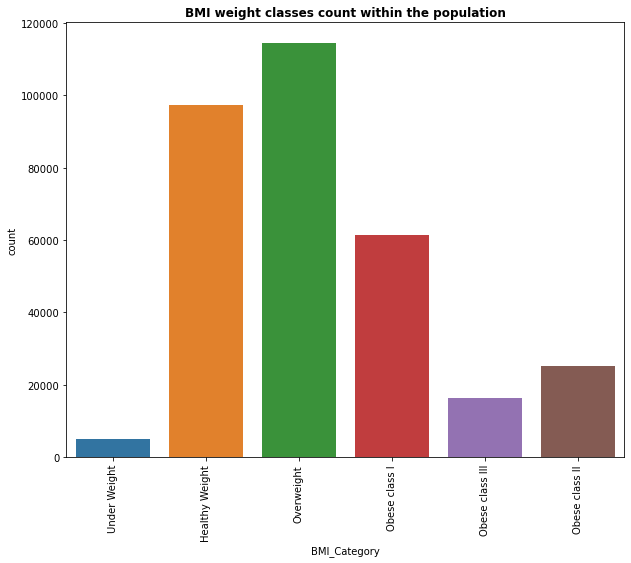

In [4]:
plt.figure(figsize = (10,8))
ax = sb.countplot(data=heart_disease_df, x='BMI_Category')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, size = 10)
plt.title("BMI weight classes count within the population", weight = "bold");

## Visualization 2 - Investigating correlation using a correlation heat map
The correalation plot shows at best only a week positive correlation between physical and mental health status of the subjects. None of the other variables are correlated. Further analysis using a grid plot also reveals the same information. This is quite surprising as research has conclusively determind for example, that a lack of sleep is associated with worsening physical and mental health, as well as obesity, that trend is not so obvious in our dataset.


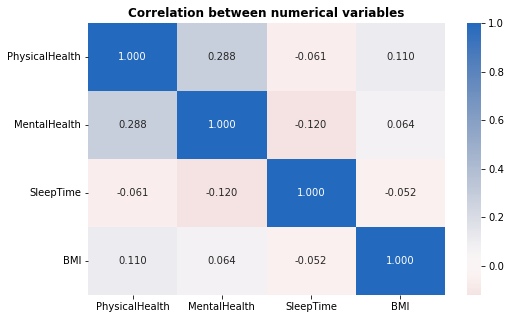

In [5]:
#I will divide the columns of the dataframe into two subclasses, based on the data type.

numeric_variables = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI']
categoric_variables = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'SkinCancer', 'Sex', 'KidneyDisease', 'AgeCategory', 'Race', 'Diabetic', 'Asthma', 'PhysicalActivity', 'BMI_Category']

plt.figure(figsize = [8, 5])
sb.heatmap(heart_disease_df[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation between numerical variables', weight = "bold")
plt.show()

## Visualization 3 - A Pairplot to further investigate distributions and correlation between variables

In order for the plot to render faster, a sample of 2000 repondents was taken and plotted. The findings from the multivariate plot echo the findings from the earlier plot types, features that are historically found to correlate failed to show this relationship in our dataset.



In [6]:
heart_disease_samp = heart_disease_df.sample(n=2000, replace = False)
print("heart_disease_samp.shape=",heart_disease_samp.shape)

heart_disease_samp.shape= (2000, 19)


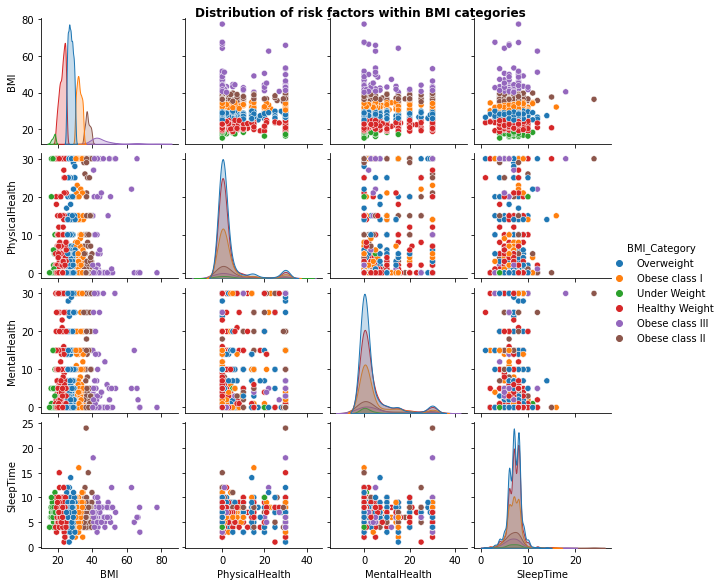

In [7]:

p = sb.pairplot(heart_disease_samp, hue="BMI_Category")
p.fig.set_size_inches(10, 8)
p.fig.suptitle('Distribution of risk factors within BMI categories', y=1, weight = "bold" );

In [2]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 865235 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\HP\anaconda3\lib\site-